# Gator Oscillator

https://www.metatrader5.com/en/terminal/help/indicators/bw_indicators/go

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = '^NSEBANK'
start = '2020-01-01'
end = '2023-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02 00:00:00+05:30,32133.150391,32465.449219,32121.400391,32443.849609,32443.472656,253600
2020-01-03 00:00:00+05:30,32326.949219,32329.800781,31960.400391,32069.250000,32068.876953,217600
2020-01-06 00:00:00+05:30,31910.449219,31914.449219,31170.550781,31237.150391,31236.787109,256200
2020-01-07 00:00:00+05:30,31598.050781,31851.449219,31200.900391,31399.400391,31399.035156,294400
2020-01-08 00:00:00+05:30,30995.500000,31451.849609,30899.550781,31373.650391,31373.285156,304500


In [3]:
def SMMA(price, n, m=3):
    SMMA = np.array([np.nan] * len(price))
    SMMA[n - 2] = price[:n - 1].mean()
    for i in range(n - 1, len(price)):
        SMMA[i] = (SMMA [i - 1] * (n - 2) + 2 * price[i]) / n
    return SMMA

In [4]:
medianprice = (df['High']/2) + (df['Low']/2)
df['Jaw'] = SMMA(medianprice,13,8)
df['Teeth'] = SMMA(medianprice,8 ,5)
df['Lips']  = SMMA(medianprice,5 ,3) 

In [5]:
df

,Open,High,Low,Close,Adj Close,Volume,Jaw,Teeth,Lips
Date,,,,,,,,,
2020-01-02 00:00:00+05:30,32133.150391,32465.449219,32121.400391,32443.849609,32443.472656,253600,NaN,NaN,NaN
2020-01-03 00:00:00+05:30,32326.949219,32329.800781,31960.400391,32069.250000,32068.876953,217600,NaN,NaN,NaN
2020-01-06 00:00:00+05:30,31910.449219,31914.449219,31170.550781,31237.150391,31236.787109,256200,NaN,NaN,NaN
2020-01-07 00:00:00+05:30,31598.050781,31851.449219,31200.900391,31399.400391,31399.035156,294400,NaN,NaN,31876.800049
2020-01-08 00:00:00+05:30,30995.500000,31451.849609,30899.550781,31373.650391,31373.285156,304500,NaN,NaN,31596.360107
...,...,...,...,...,...,...,...,...,...
2022-12-23 00:00:00+05:30,41951.351562,42226.648438,41597.648438,41668.050781,41667.566406,332600,43007.733546,42828.071901,42541.185330
2022-12-27 00:00:00+05:30,42827.750000,42927.199219,42394.148438,42859.500000,42859.000000,229600,42954.339743,42786.222383,42588.980729
2022-12-28 00:00:00+05:30,42733.601562,43034.949219,42694.851562,42827.699219,42827.203125,230500,42940.579843,42805.891885,42699.348594


https://mahifx.com/mfxtrade/indicators/gator-oscillator

Top bars of histogram (Above zero) = Absolute value (Jaw – Teeth)

Bottom bars of histogram (Below zero) = - {Absolute value of (Teeth – Lips)}

In [6]:
df['Top_Bars'] = abs(df['Jaw'] - df['Teeth'])
df['Bottom_Bars'] = -(abs(df['Teeth'] - df['Lips']))

In [7]:
df

,Open,High,Low,Close,Adj Close,Volume,Jaw,Teeth,Lips,Top_Bars,Bottom_Bars
Date,,,,,,,,,,,
2020-01-02 00:00:00+05:30,32133.150391,32465.449219,32121.400391,32443.849609,32443.472656,253600,NaN,NaN,NaN,NaN,NaN
2020-01-03 00:00:00+05:30,32326.949219,32329.800781,31960.400391,32069.250000,32068.876953,217600,NaN,NaN,NaN,NaN,NaN
2020-01-06 00:00:00+05:30,31910.449219,31914.449219,31170.550781,31237.150391,31236.787109,256200,NaN,NaN,NaN,NaN,NaN
2020-01-07 00:00:00+05:30,31598.050781,31851.449219,31200.900391,31399.400391,31399.035156,294400,NaN,NaN,31876.800049,NaN,NaN
2020-01-08 00:00:00+05:30,30995.500000,31451.849609,30899.550781,31373.650391,31373.285156,304500,NaN,NaN,31596.360107,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23 00:00:00+05:30,41951.351562,42226.648438,41597.648438,41668.050781,41667.566406,332600,43007.733546,42828.071901,42541.185330,179.661645,-286.886572
2022-12-27 00:00:00+05:30,42827.750000,42927.199219,42394.148438,42859.500000,42859.000000,229600,42954.339743,42786.222383,42588.980729,168.117360,-197.241654
2022-12-28 00:00:00+05:30,42733.601562,43034.949219,42694.851562,42827.699219,42827.203125,230500,42940.579843,42805.891885,42699.348594,134.687958,-106.543291


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


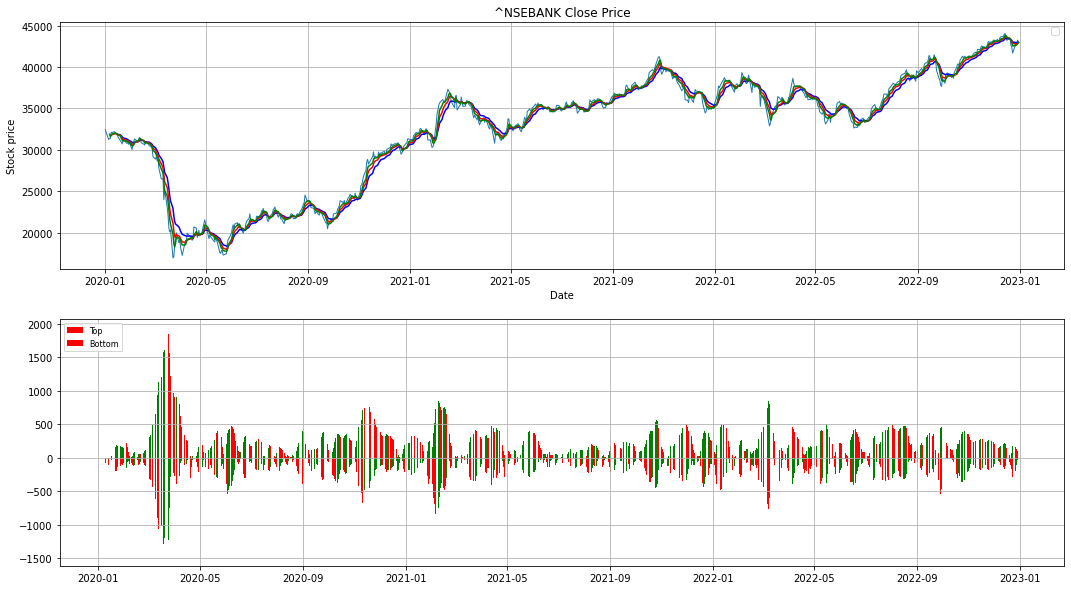

In [8]:
fig = plt.figure(figsize=(18,10))

ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(df['Adj Close'],lw=1)
ax1.plot(df['Jaw'],color='blue')
ax1.plot(df['Teeth'],color='red')
ax1.plot(df['Lips'],color='green')
ax1.set_title(symbol + ' Close Price')
ax1.set_ylabel('Stock price')
ax1.set_xlabel('Date')
ax1.grid(True)
ax1.legend(loc='best')

ax2 = fig.add_subplot(2, 1, 2)
df['Positive_T'] = df.Top_Bars > df.Top_Bars.shift(1)
df['Positive_B'] = df.Bottom_Bars > df.Bottom_Bars.shift(1)
ax2.bar(df.index, df['Top_Bars'], color=df.Positive_T.map({True: 'g', False: 'r'}), label='Top')
ax2.bar(df.index, df['Bottom_Bars'], color=df.Positive_B.map({True: 'g', False: 'r'}), label='Bottom')
#ax2.bar(df.index, df['Top_Bars'],label='Top')
#ax2.bar(df.index, df['Bottom_Bars'],label='Bottom')
ax2.legend(loc=2,prop={'size':8})
ax2.grid(True)

In [10]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Jaw,Teeth,Lips,Top_Bars,Bottom_Bars,Positive_T,Positive_B,VolumePositive
0,18262.770833,32133.150391,32465.449219,32121.400391,32443.849609,32443.472656,253600,NaN,NaN,NaN,NaN,NaN,False,False,True
1,18263.770833,32326.949219,32329.800781,31960.400391,32069.250000,32068.876953,217600,NaN,NaN,NaN,NaN,NaN,False,False,False
2,18266.770833,31910.449219,31914.449219,31170.550781,31237.150391,31236.787109,256200,NaN,NaN,NaN,NaN,NaN,False,False,False
3,18267.770833,31598.050781,31851.449219,31200.900391,31399.400391,31399.035156,294400,NaN,NaN,31876.800049,NaN,NaN,False,False,False
4,18268.770833,30995.500000,31451.849609,30899.550781,31373.650391,31373.285156,304500,NaN,NaN,31596.360107,NaN,NaN,False,False,True


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


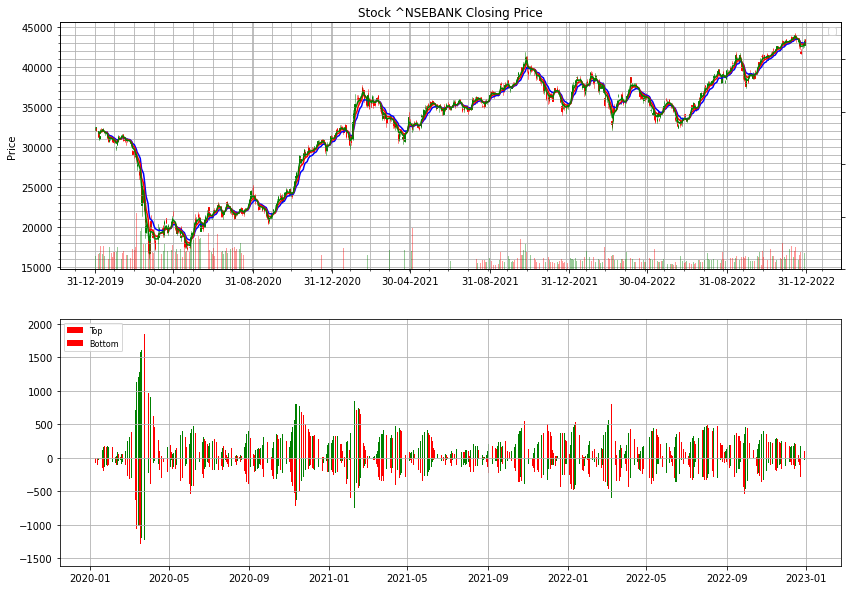

In [12]:
from mpl_finance import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.plot(df['Jaw'],color='blue')
ax1.plot(df['Teeth'],color='red')
ax1.plot(df['Lips'],color='green')
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')
ax1.legend(loc='best')

ax2 = fig.add_subplot(2, 1, 2)
df['Positive_T'] = df.Top_Bars > df.Top_Bars.shift(1)
df['Positive_B'] = df.Bottom_Bars > df.Bottom_Bars.shift(1)
ax2.bar(df.index, df['Top_Bars'], color=df.Positive_T.map({True: 'g', False: 'r'}), label='Top')
ax2.bar(df.index, df['Bottom_Bars'], color=df.Positive_B.map({True: 'g', False: 'r'}), label='Bottom')
ax2.legend(loc=2,prop={'size':8})
ax2.grid(True)